In [1]:
import numpy as np
import sys 
import matplotlib.pyplot as plt
%matplotlib inline  
np.random.seed(42)
from scipy.spatial import distance

In [2]:

def cd(A, X):
    return distance.cdist(A, X)

In [3]:
a = np.array([[1,2,3], [1,2,4]])
b = np.array([[1,2,5], [1,2,6], [1,2,7]])
cd(a,b)[1][2]

3.0

In [4]:
import struct
import gzip
#Piece of magic found online
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [5]:
train_x = read_idx("train-images-idx3-ubyte.gz")
train_y = read_idx("train-labels-idx1-ubyte.gz")
test_x = read_idx("t10k-images-idx3-ubyte.gz")
test_y = read_idx("t10k-labels-idx1-ubyte.gz")

/home/fell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [6]:
train_x = np.array([xi.flatten() for xi in train_x[0:5000]])
train_y = train_y[0:5000]
test_x = np.array([xi.flatten() for xi in test_x[0:1000]])
test_y = test_y[0:1000]

In [7]:
dM = cd(test_x, train_x)

In [8]:
fr = dM[0]
indices = np.argsort(fr)[:10]

In [9]:



A = np.array([[1,2,3], [1,4,5], [7,8,9]])
B = np.array([[1,2,3], [1,2,3]])
abba = cd(B,  A)
abba[0]


array([ 0.        ,  2.82842712, 10.39230485])

In [121]:
from collections import Counter

def mostCommon(indices, Y):
    values = [0.0] * len(indices)
    for i in range(0, len(indices)):
        values[i] = Y[indices[i]]
    
    ret = Counter(values).most_common(1)[0][0]
    return ret
    
def knn(DM, Y, k = 1):
    result = [None] * len(DM)
    for i in range(0, len(DM)):
        distances = DM[i]
        indices = np.argsort(distances)[:k]
        result[i] = mostCommon(indices, Y)
    return np.array(result)



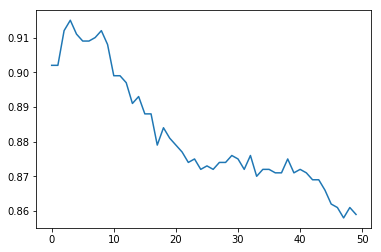

In [122]:
max_k = 50
results = [0.0] * max_k

for k in range(0, max_k):
    y_hat = knn(dM, train_y, k + 1)
    results[k] = (y_hat == test_y).sum() / (len(test_y) * 1.0)

plt.plot(results)


In [12]:
# Problem 2
train_x = read_idx("train-images-idx3-ubyte.gz")
train_y = read_idx("train-labels-idx1-ubyte.gz")
train_x = np.array([xi.flatten() for xi in train_x[0:60000]])
train_y = train_y[0:60000]

/home/fell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


'\nn = 60000\n\nX = train$x[1:n,]\nY = train$y[1:n]\n\nX_mean <- colMeans(X) # vector containing mean of each column\nX_centered <- sweep(X,2,X_mean, FUN = "-") #subtract the mean vector from each row of X\n\n# a vector containing the standard deviations (denominator/normalization contant is n) of columns\nX_sd <- sqrt(colMeans(X_centered**2)) \nX_sd[X_sd == 0] = 1 # set zero entries to one\n\nZ <- sweep(X_centered,2,X_sd,FUN = "/") # divide columns of (centered) X by their standard deviations\n\n# empirical covariance\nXtX <- t(Z) %*% Z / n\n'

In [26]:
# Transpose for taking mean of each column
tran_x_T = np.transpose(train_x)
# Mean of each column
means = np.array([np.mean(xi) for xi in tran_x_T])
# Substract mean from each row
x_centered = train_x - means

# Raise centered to power of two
x_centered_p2 = np.power(x_centered, 2)

# Column wise means from centered
x_centered_T = np.transpose(x_centered_p2)
x_centered_means = np.array([np.mean(xi) for xi in x_centered_T])

# Take sqrt of means
X_sd = np.sqrt(x_centered_means)
# Set zeros to one
X_sd[X_sd == 0] = 1

# Divide each row with it's standard deviation
Z = np.array([xi / X_sd for xi in x_centered])

# Multiply Z with it's transpose and divide with the original size 60 000
XtX = np.matmul(np.transpose(Z), Z) / 60000

In [45]:
diagonalValues = np.diag(XtX)
# Counts zeros, since diagonalValues == 0 returns booleans!
zeros = np.count_nonzero(diagonalValues == 0)
closetoone = np.count_nonzero(np.absolute(diagonalValues[diagonalValues != 0] - 1) < np.float32(1e-10))
closetoone + zeros

784

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

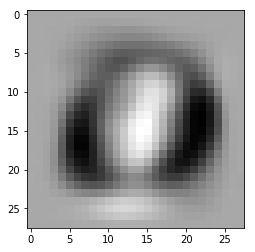

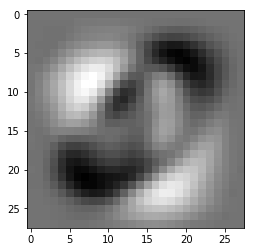

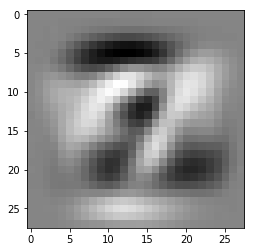

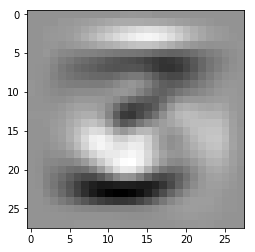

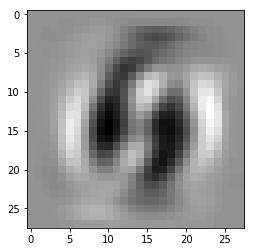

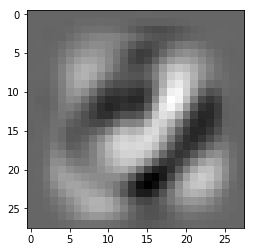

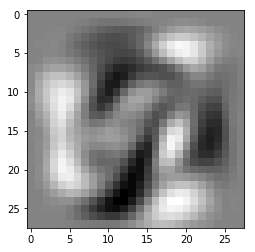

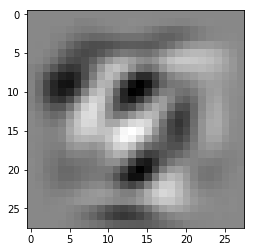

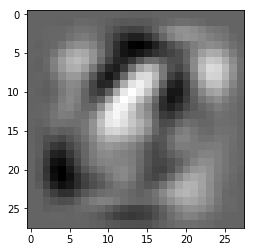

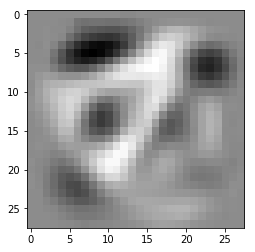

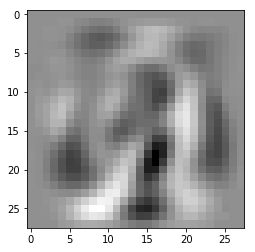

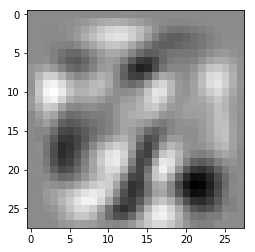

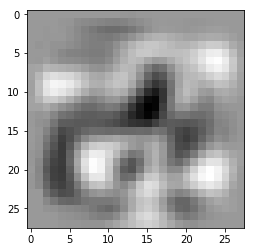

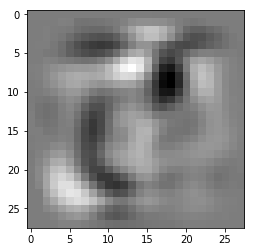

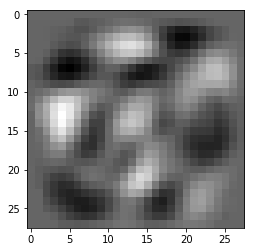

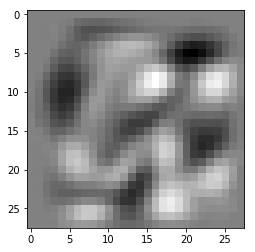

"\nabba = np.transpose(eigenvectors)\natt = abba[202]\npic = np.reshape(att, (28, 28))\nplt.imshow(pic, cmap='gray')\nplt.show()\n"

In [69]:
eigenvalues, eigenvectors = np.linalg.eig(XtX)

n_rows = 4
n_columns = 4
n_eigs = n_rows * n_columns

eigenvectorsT = np.transpose(eigenvectors)

for i in range(0, n_eigs):
    plt.imshow(np.reshape(eigenvectorsT[i], (28, 28)), cmap='gray')
    plt.show()

array([0.92215881])

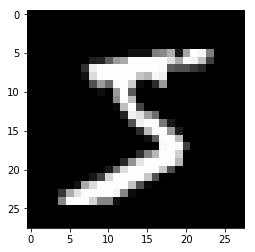

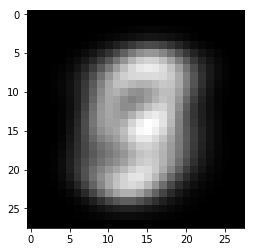

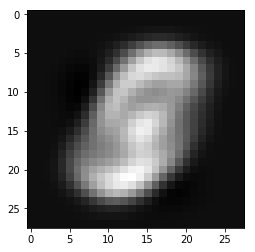

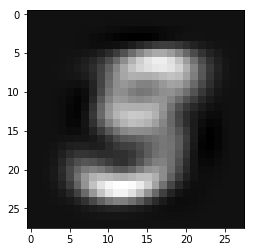

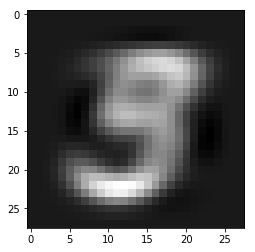

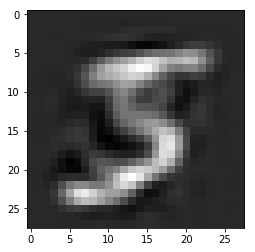

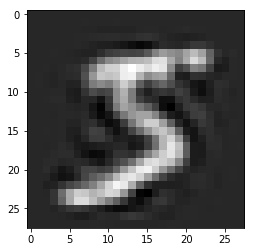

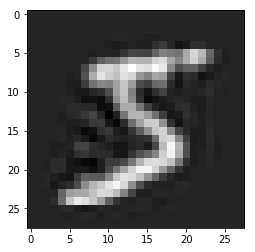

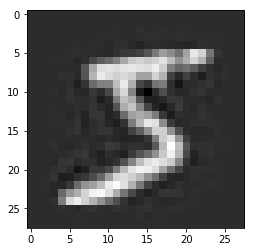

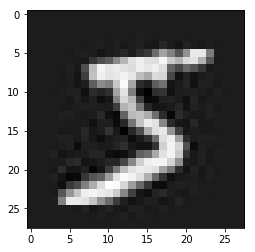

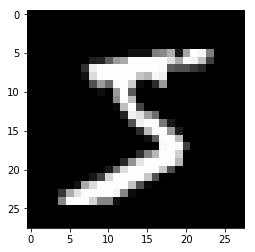

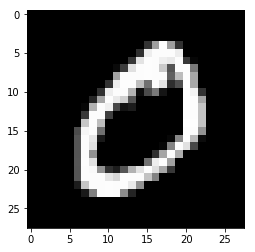

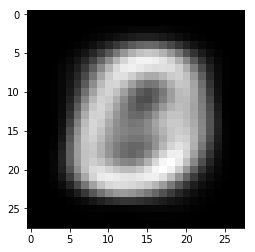

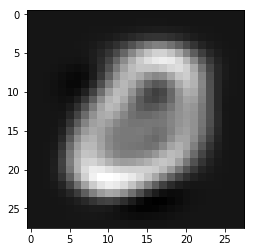

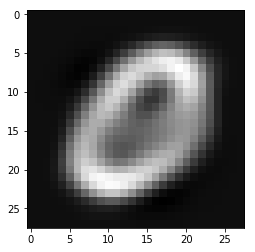

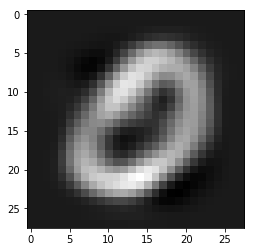

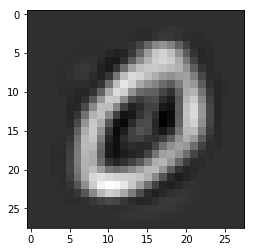

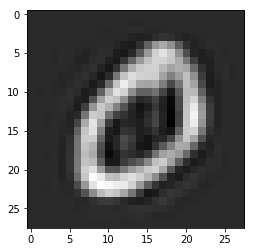

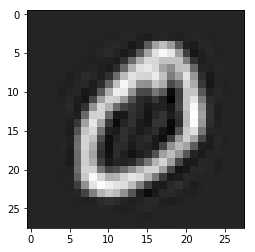

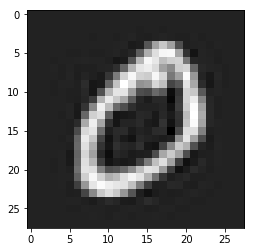

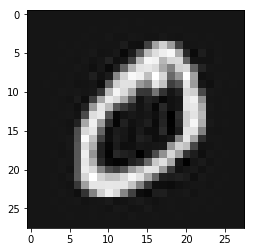

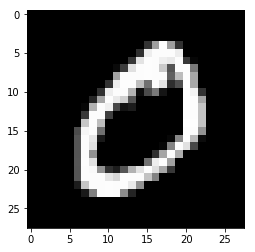

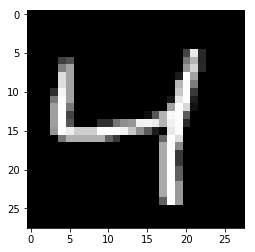

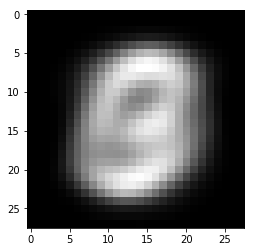

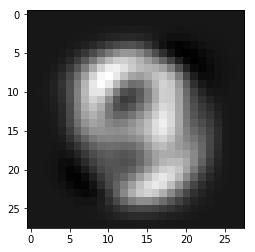

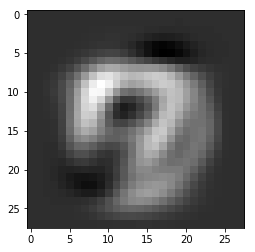

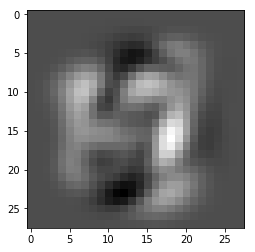

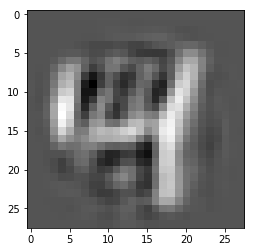

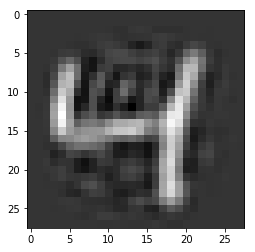

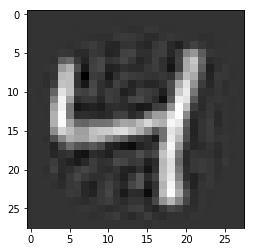

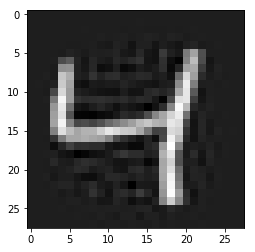

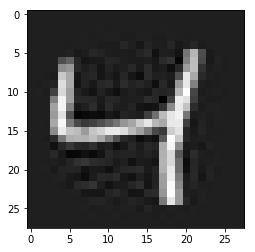

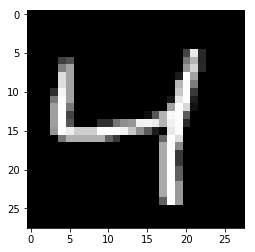

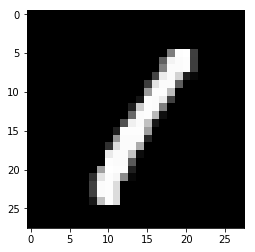

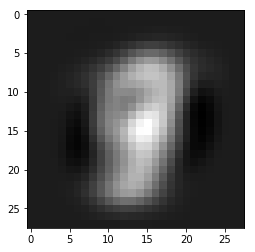

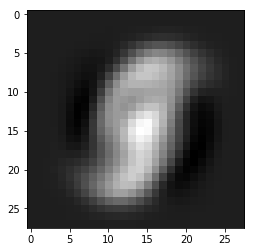

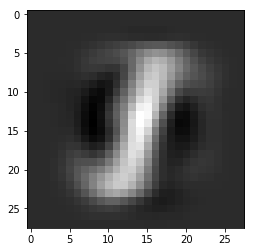

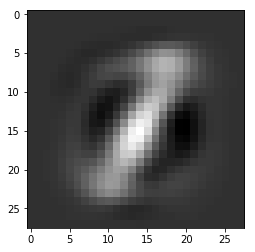

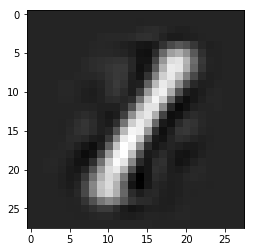

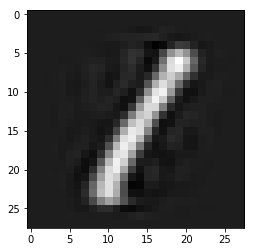

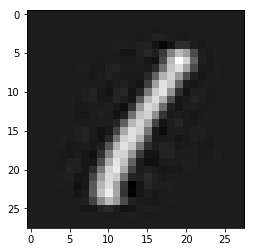

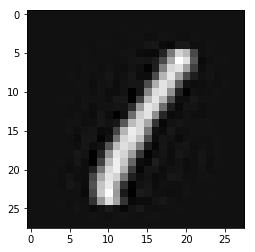

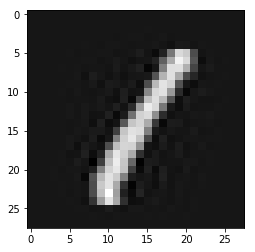

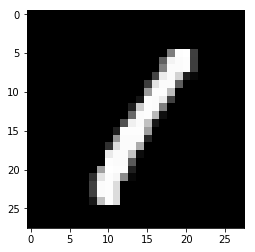

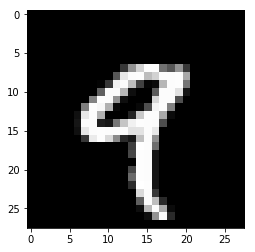

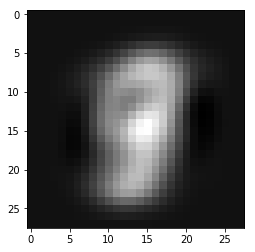

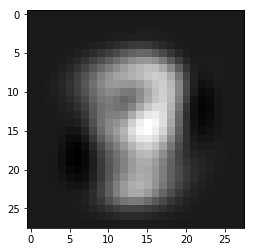

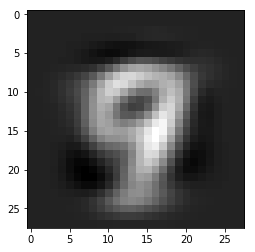

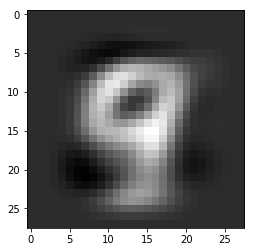

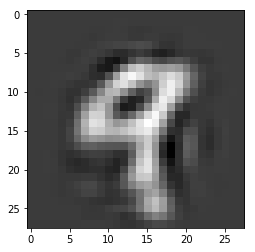

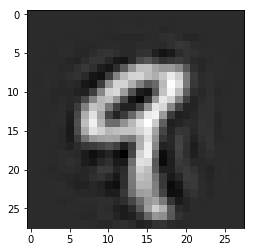

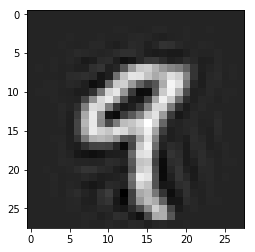

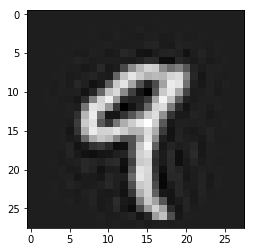

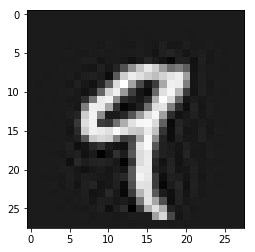

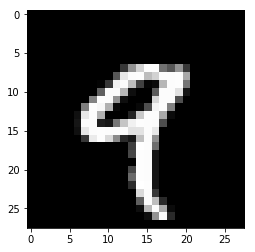

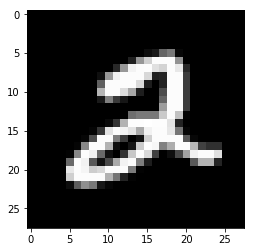

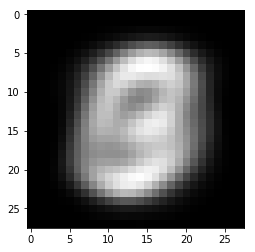

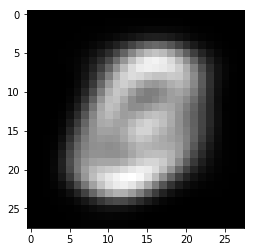

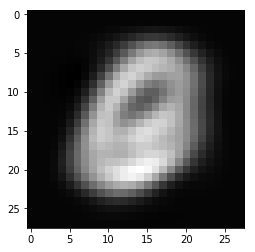

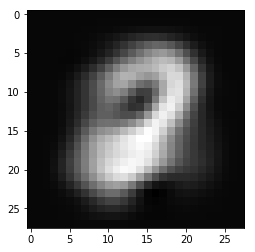

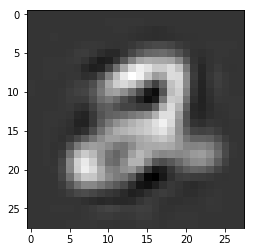

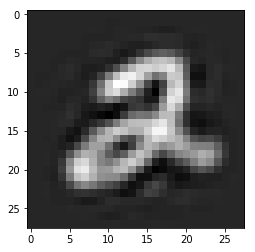

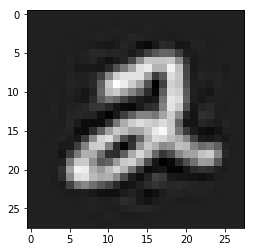

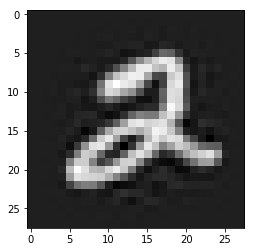

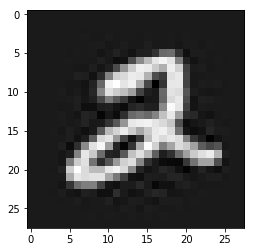

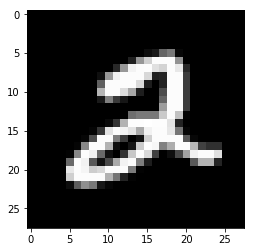

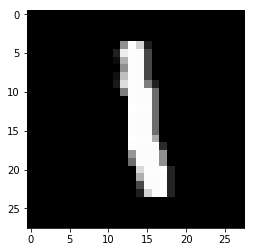

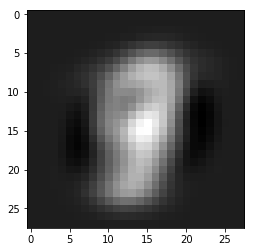

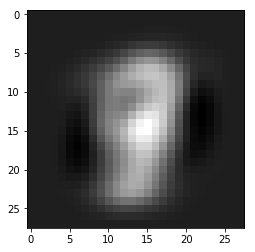

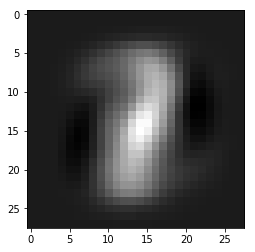

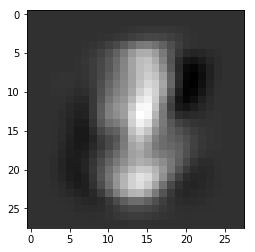

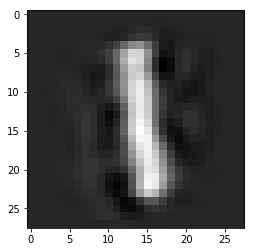

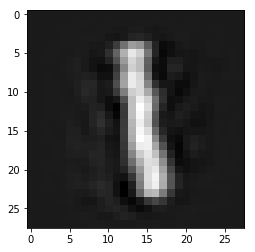

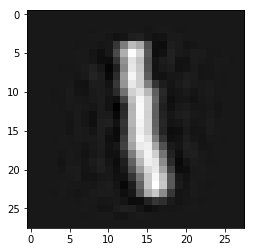

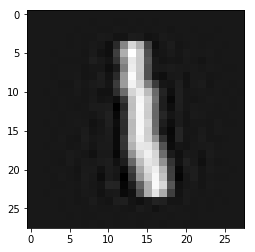

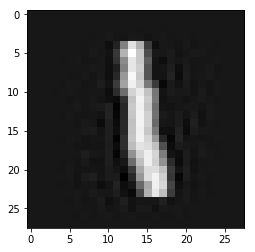

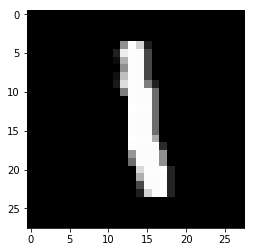

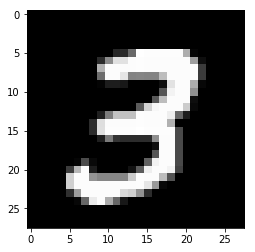

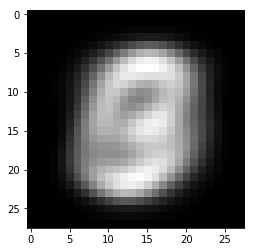

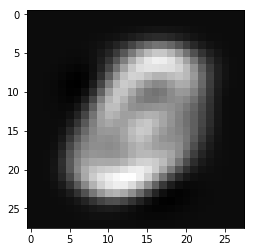

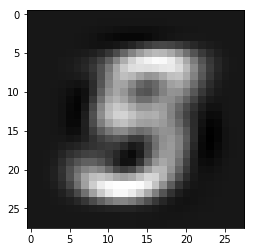

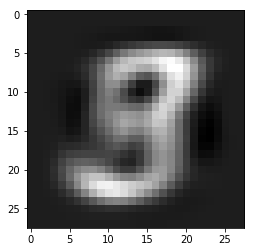

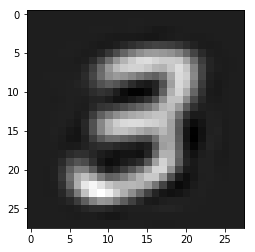

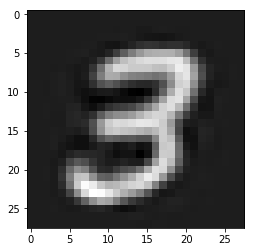

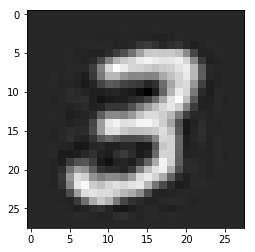

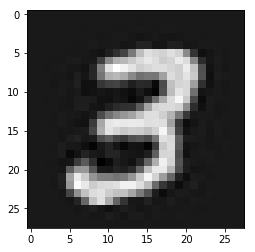

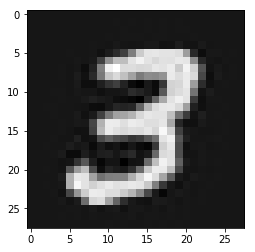

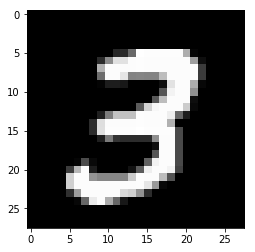

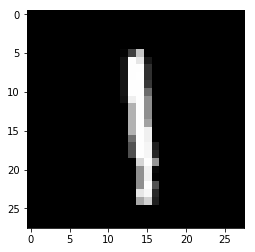

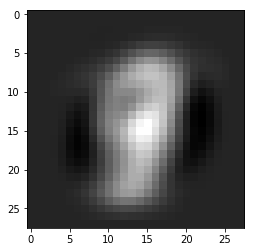

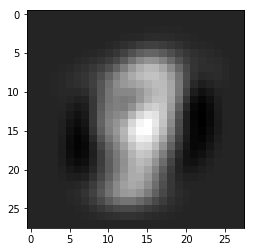

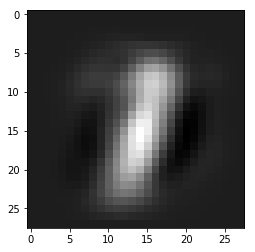

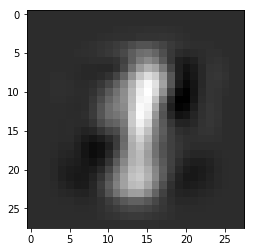

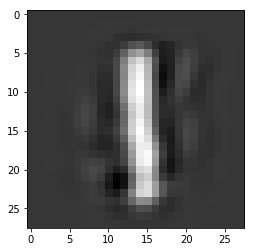

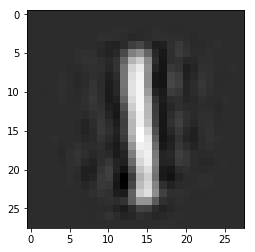

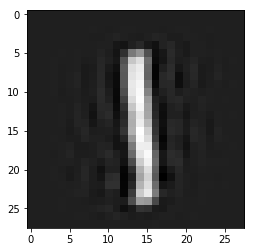

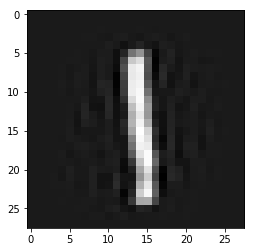

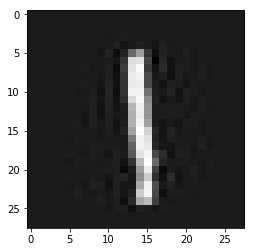

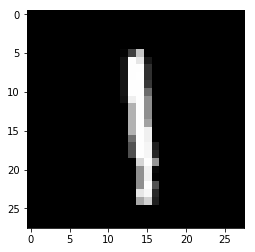

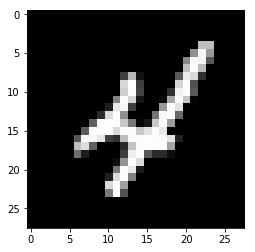

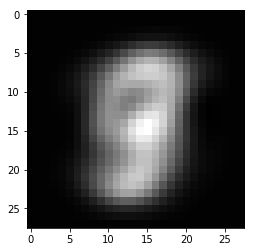

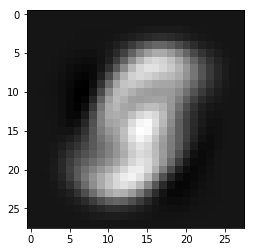

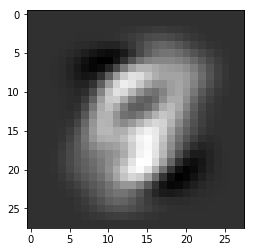

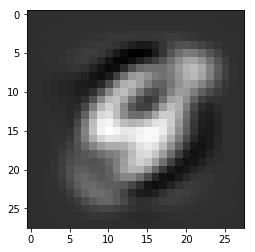

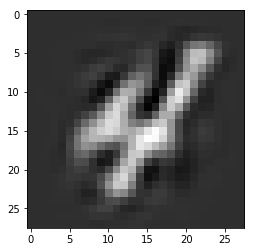

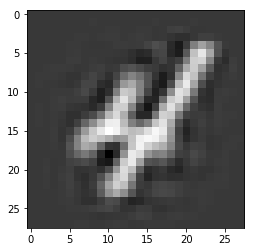

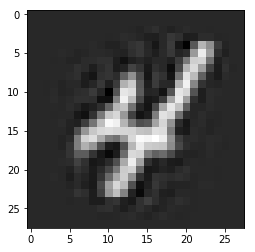

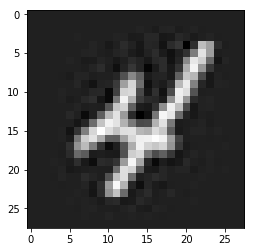

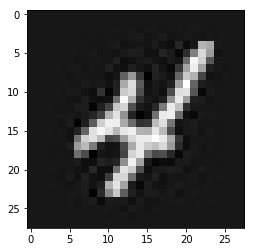

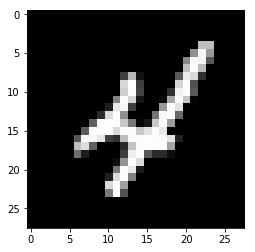

In [85]:
n_digits = 10

pcs = [1, 2, 5, 10, 100, 200, 300, 400, 500, 784]
n_recon = len(pcs)

for i in range(0, n_digits):
    plt.imshow(np.reshape(train_x[i], (28, 28)), cmap='gray')
    plt.show()
    for j in range(0, n_recon):
        n_pc = pcs[j]
        ZeT = np.matmul(Z[i], np.transpose(eigenvectorsT[0:n_pc]))
        X_hat = np.matmul(ZeT, eigenvectorsT[0:n_pc]) * X_sd + means
        plt.imshow(np.reshape(X_hat, (28, 28)), cmap='gray')
        plt.show()
    
    

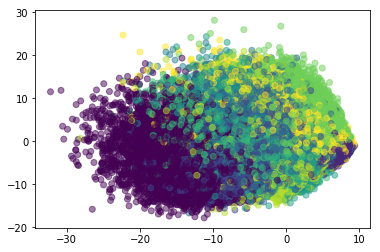

In [106]:
p1 = eigenvectorsT[0]
p2 = eigenvectorsT[1]

pc1  = np.matmul(Z, p1)
pc2 = np.matmul(Z, p2)
colors = np.random.rand(10)
plt.scatter(pc1, pc2, c=train_y, alpha=0.5)
plt.show()

In [134]:
ntest = 1000
# Substract mean from each row
test_x_centered = test_x - means
Ztest = np.array([xi / X_sd for xi in test_x_centered])

k = 5
for q in [5, 10, 20, 40, 80]:
    Xq = np.matmul(Z, np.transpose(eigenvectorsT[0:q]))
    Xqtest = np.matmul(Ztest, np.transpose(eigenvectorsT[0:q]))
    dists = cd(Xqtest, Xq)
    yhat = knn(dists, train_y, k)
    accuracy = (yhat == test_y).sum() / (len(test_y) * 1.0)
    print("q=",q,"k=",k,"accuracy=", accuracy)

q= 5 k= 5 accuracy= 0.69
q= 10 k= 5 accuracy= 0.881
q= 20 k= 5 accuracy= 0.932
q= 40 k= 5 accuracy= 0.948
q= 80 k= 5 accuracy= 0.951


In [ ]:
"""
set.seed(123456)

# define parameters
n <- 100
mu <- 0
sigma <- sqrt(100)
m <- 1000

# how many times the true mean is inside the interval
inside_interval <- 0

# radius of the confidence interval
r <- 1.96*(sigma/sqrt(n)) 

# sample 'm' data sets of size 'n'
X <- matrix(rnorm(n*m,mean = mu,sd = sigma), nrow = m)

for(ii in 1:m) {
    
    est_mu <- mean(X[ii,])
    
    if(est_mu - r < mu && mu < est_mu + r) {
            inside_interval <- inside_interval + 1
    }
}

cat("The proportion of confidence intervals that include the true parameter: ", inside_interval/m)

"""

In [145]:
#Problem 3 a
import math
n = 100
mu = 0
sigma = math.sqrt(100)
m = 1000

insideInterval = 0

r = 1.96*(sigma/math.sqrt(n))
X = np.reshape(np.random.normal(mu, sigma, n*m), (m, n))

for i in range(0, m):
    est_mu = np.mean(X[i])
    if (est_mu - r < mu and mu < est_mu + r):
        insideInterval = insideInterval + 1

print("Inside interval", insideInterval / m)

Inside interval 0.942


'\nbootstrap_mean <- function(X,K = 1000, N = 100) {\n    \n        means <- numeric(K) \n    \n        for(ii in 1:K) {\n            D_star <- sample(X,size = N,replace = TRUE)\n            means[ii] <- mean(D_star)\n        }\n    \n        return( as.numeric(quantile(means,c(.025,0.975)) ))\n}\n'

In [158]:
def bootstrap_mean(X, k = 1000, n = 100):
    means = [0.0] * k
    for i in range(0, k):
        D_star = np.random.choice(X, n)
        means[i] = np.mean(D_star)
    return np.quantile(means, [0.025, 0.975])

bootstrap_mean(X[1,], k = 1000, n = n)


array([-3.15235154,  0.66650227])

In [160]:
[np.mean(X[0]) - r, np.mean(X[0]) + r]

[-2.3648543849046035, 1.5551456150953964]

In [164]:
insideInterval = 0
for i in range(0, m):
    interval = bootstrap_mean(X[i], k = 1000, n = n)
    if (interval[0] - r < mu and mu < interval[1] + r):
        insideInterval = insideInterval + 1

print("Inside interval", insideInterval / m)

Inside interval 1.0
